In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
nba_rookie_data = pd.read_csv('C:/Users/jho/Desktop/data_science/nba_rookie_data.csv')

players_yes = nba_rookie_data[nba_rookie_data['TARGET_5Yrs'] == 1]

players_no = nba_rookie_data[nba_rookie_data['TARGET_5Yrs'] == 0]
players_no = players_no[players_no['Year Drafted'] <= 2012]

players_new = nba_rookie_data[nba_rookie_data['Year Drafted'] > 2012]

I will perform inferential statistics on the two sets of players, those who ended up playing for at least five years and those who did not end up playing for five years, to determine if there are significant differences between the two groups of players.

The most important stats that determine an NBA player's career longevity is player efficiency rating, minutes per game, and field goal percentage.

Null Hypothesis: There is no statistically significant difference in stats between the two groups of players.
Alternate Hypothesis: There is a statistically significant difference in stats between the two groups of players.

In [31]:
# useful functions

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    concat_data = np.concatenate((data_1, data_2))

    for i in range(size):
        # Generate permutation sample
        perm_sample = np.random.permutation(concat_data)
        perm_1 = perm_sample[:len(data_1)]
        perm_2 = perm_sample[len(data_1):]

        # Compute the test statistic
        perm_replicates[i] = abs(func(perm_1, perm_2))
        
    return perm_replicates

def p_value(perm_replicates, difference):

    p = np.sum(perm_replicates >= difference) / len(perm_replicates)

    return p

def standard_error(data_1, data_2):

    se = (np.std(data_1)/np.sqrt(len(data_1))) + (np.std(data_2)/np.sqrt(len(data_2)))

    return se

def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [5]:
difference_efficiency = diff_of_means(players_yes['EFF'], players_no['EFF'])
print('difference of efficiency: ', difference_efficiency)

difference_mpg = diff_of_means(players_yes['MIN'], players_no['MIN'])
print('difference of minutes per game: ', difference_mpg)

difference_fg = diff_of_means(players_yes['FG%'], players_no['FG%'])
print('difference of field goal percentage: ', difference_fg)

difference of efficiency:  3.4612195121951173
difference of minutes per game:  6.055853658536565
difference of field goal percentage:  2.4389024390244174


In [12]:
perm_reps_eff = perm_reps(players_yes['EFF'], players_no['EFF'], diff_of_means, size=10000)

diff_eff = diff_of_means(players_yes['EFF'], players_no['EFF'])

p_eff = p_value(perm_reps_eff, diff_eff)

print('p-value for efficiency = ', p_eff)

p-value for efficiency =  0.0


In [13]:
perm_reps_minutes = perm_reps(players_yes['MIN'], players_no['MIN'], diff_of_means, size=10000)

diff_minutes = diff_of_means(players_yes['MIN'], players_no['MIN'])

p_minutes = p_value(perm_reps_minutes, diff_minutes)

print('p-value for minutes per game = ', p_minutes)

p-value for minutes per game =  0.0


In [14]:
perm_reps_fgp = perm_reps(players_yes['FG%'], players_no['FG%'], diff_of_means, size=10000)

diff_fgp = diff_of_means(players_yes['FG%'], players_no['FG%'])

p_fgp = p_value(perm_reps_fgp, diff_fgp)

print('p-value for field goal percentage = ', p_fgp)

p-value for field goal percentage =  0.0


Each of the p-values from the three NBA stats between the two groups of players came out to be 0, which means I can reject my null hypothesis that there is no statistically significant difference between the two groups of players.

As expected, there is some statistically significant difference between the players who played for at least five years and those who did not play for five years. 

Below I run the same p-value calculations, but using the permutation_sample and draw_perm_reps functions at the bottom of the notebook. All resulting p-values equal 0.

Below I calculated error margin from the mean and confidence interval for each of the three stats. Based on the differences of means, the confidence interval at the 95% level is shown to indicate the range of difference for each of the stats between the two groups of players. 

In [19]:
diff_eff = diff_of_means(players_yes['EFF'], players_no['EFF'])

se_eff = standard_error(players_yes['EFF'], players_no['EFF'])

margin_error_eff = 1.96 * se_eff

confidence_interval_eff = [diff_eff - margin_error_eff, diff_eff + margin_error_eff]

print('margin of error: ', margin_error_eff)
print('confidence interval: ', confidence_interval_eff)

margin of error:  0.626950500676
confidence interval:  [2.8342690115187499, 4.0881700128714842]


In [21]:
diff_minutes = diff_of_means(players_yes['MIN'], players_no['MIN'])

se_minutes = standard_error(players_yes['MIN'], players_no['MIN'])

margin_error_minutes = 1.96 * se_minutes

confidence_interval_minutes = [diff_eff - margin_error_eff, diff_eff + margin_error_eff]

print('margin of error: ', margin_error_minutes)
print('confidence interval: ', confidence_interval_minutes)

margin of error:  1.1909907187
confidence interval:  [2.8342690115187499, 4.0881700128714842]


In [23]:
diff_fgp = np.abs(diff_of_means(players_yes['FG%'], players_no['FG%']))

se_fgp = standard_error(players_yes['FG%'], players_no['FG%'])

margin_error_fgp = 1.96 * se_fgp

confidence_interval_fgp = [diff_fgp - margin_error_fgp, diff_fgp + margin_error_fgp]

print('margin of error: ', margin_error_fgp)
print('confidence interval: ', confidence_interval_fgp)

margin of error:  1.01306084641
confidence interval:  [1.4258415926171868, 3.4519632854316482]


There is a notable difference between the two groups for minutes per game, ranging from 4.8 and 7.2 minutes out of 48. The players who played longer than five years received more playing time. 

I think it would be a good idea to calculate the correlation between these variable to see if that contributes to the outcome of playing at least five years.

In [26]:
# players who have played at least five years.

r_eff_mpg = pearson_r(players_yes['EFF'], players_yes['MIN'])
print('correlation between efficiency and minutes per game: ', r_eff_mpg)

r_eff_fg = pearson_r(players_yes['EFF'], players_yes['FG%'])
print('correlation between efficiency and field goal %: ', r_eff_fg)

r_fg_mpg = pearson_r(players_yes['FG%'], players_yes['MIN'])
print('correlation between field goal % and minutes per game: ', r_fg_mpg)

correlation between efficiency and minutes per game:  0.92311453278
correlation between efficiency and field goal %:  0.334097712644
correlation between field goal % and minutes per game:  0.132525035415


Minutes per game and Efficiency have a strong positive correlation. Players who have a high efficiency rating are likely playing more because they contribute more offense and defense while on the court. The correlation for efficiency and minutes per game likely contributed to the outcome of playing five years. 

Below I provided the correlations for players who did not play for five years. Since their stats are lower, there should still be similar correlations between the stats since they contributed to the outcome of not playing five years.

In [27]:
# players who have not played for five years.

r_eff_mpg = pearson_r(players_no['EFF'], players_no['MIN'])
print('correlation between efficiency and minutes per game: ', r_eff_mpg)

r_eff_fg = pearson_r(players_no['EFF'], players_no['FG%'])
print('correlation between efficiency and field goal %: ', r_eff_fg)

r_fg_mpg = pearson_r(players_no['FG%'], players_no['MIN'])
print('correlation between field goal % and minutes per game: ', r_fg_mpg)

correlation between efficiency and minutes per game:  0.90507467011
correlation between efficiency and field goal %:  0.445937382185
correlation between field goal % and minutes per game:  0.225143360957


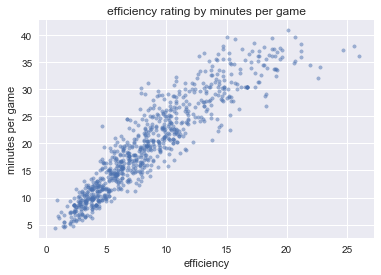

In [29]:
sns.set()

plt.scatter(players_yes['EFF'], players_yes['MIN'], alpha=0.5, marker='.')
plt.xlabel('efficiency')
plt.ylabel('minutes per game')
plt.title('efficiency rating by minutes per game')

plt.show()

This scatterplot just visually illustrates the strong correlation between efficiency and minutes per game. 

These two player statistics together combine for some of the more powerful metrics when determining a players talent and durability.

Below I have included a histogram of both groups of players to visually see the frequency of players and their efficiency rating. There is a much higher concentration of players on the right of the histogram for players who have played at least five years compared to those who did not. There is a higher concentration players on the left of the efficiency spectrum who did not play for five years, which supports the statistical analysis above. 

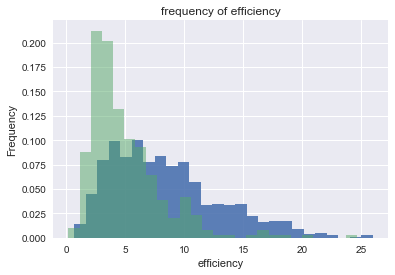

In [30]:
sns.set()

eff_yes = players_yes['EFF'].plot(kind='hist', normed=True, bins=26, alpha=0.9, label='eff_yes')
eff_no = players_no['EFF'].plot(kind='hist', normed=True, bins=26, alpha=0.5, label='eff_no')

plt.xlabel('efficiency')
plt.title('frequency of efficiency')

plt.show()